

# Introduction aux Processus Stochastiques (PRSTO)
*P. Carmona*

Pour avancer dans le notebook et exécuter les cellules il faut taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondrez aux  questions en modifiant ce notebook. En insérant des cellules de type Markdown pour le texte et des cellules de type code pour le code. 

Ensuite vous sauvez ce notebook sous le nom Prenom_Nom_tpmarkov.ipynb et vous le déposez sur Moodle

## Simulation d'un processus de Poisson
Nous allons simuler un processus de Poisson d'intensité $\lambda=1/10
$ mn
sur un intervalle de temps d'une journée $T=24*60=1440$. La commande


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

lam = 0.1
x = rnd.exponential(scale=1/lam)
x

40.862535940135565

génère une variable exponentielle de paramètre $\lambda$ et la place
dans $x$. Pour générer un échantillon de $n=500$ variables, calculer
la moyenne et la variance empiriques, et tracer un histogramme
normalisé,avec 50 barres, on
écrit

(array([0.08604459, 0.0759217 , 0.05061446, 0.05314519, 0.06832953,
        0.05441055, 0.03416476, 0.03543013, 0.02530723, 0.02277651,
        0.01898042, 0.0164497 , 0.00885753, 0.01518434, 0.01012289,
        0.00759217, 0.00759217, 0.00253072, 0.00126536, 0.00885753,
        0.00759217, 0.00126536, 0.00126536, 0.00379608, 0.00253072,
        0.00253072, 0.        , 0.00253072, 0.00253072, 0.        ,
        0.00126536, 0.        , 0.00126536, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00126536, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00126536]),
 array([1.78824794e-02, 1.59845832e+00, 3.17903416e+00, 4.75961000e+00,
        6.34018584e+00, 7.92076168e+00, 9.50133753e+00, 1.10819134e+01,
        1.26624892e+01, 1.42430650e+01, 1.58236409e+01, 1.74042167e+01,
        1.89847926e+01, 2.05653684e+01, 2.21459443e+01, 2.37265201e+01,
        2.53070959e+01, 2.6887

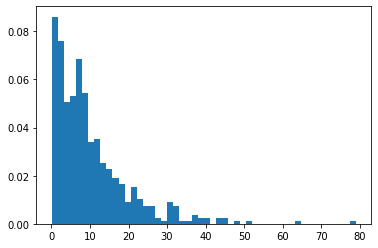

In [3]:
n = 500
x = rnd.exponential(scale=1/lam, size=n)
x.mean()
x.var()
plt.hist(x, 50, density = True)

Lorsque l'on désire des informations détaillées sur une fonction on
tape


In [4]:
?plt.hist

On améliore le graphique ci-dessus en comparant l'histogramme avec la
fonction densité.

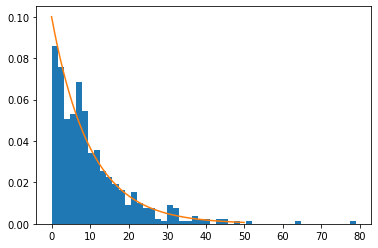

In [5]:
plt.hist(x, 50, density = True)
tt=np.linspace(0.0, 50, 200)
plt.plot(tt, lam*np.exp(-lam*tt))

## Exercice
En utilisant la structure de contrôle 

while True:

> ...
    
> if cond:
    
> > break
        

 coder une fonction 



> ...
   




In [6]:
def spoi(lam,T):
    sauts = [0]
    C = (sauts[-1]<T)
    while(C):
        t = sauts[-1] + rnd.exponential(scale=1/lam)
        if (t<T):
            sauts.append(t)
        else:
            C = False
    return(sauts)
saut = spoi(0.1, 100)
saut

[0,
 5.489921347917904,
 18.182824397132684,
 30.64179529753569,
 36.79473780628506,
 53.225846962095304,
 54.83471398193674,
 61.067971641650104,
 62.98663776340068,
 77.51377774430014,
 86.68102402104958,
 88.14361285505584,
 99.24097389890593]


 qui prend en paramètre $\lambda$
et $T$, et qui renvoie un vecteur des temps de saut du processus de
Poisson sur l'intervalle $[0,T]$.


On remarque que

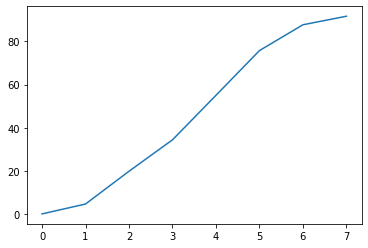

In [7]:
plt.plot(spoi(0.1,100))

n'affiche ansolument pas ce que l'on veut mais la courbe inverse.  Réfléchissez bien et affichez la bonne courbe. 

Une solution est d'écrire


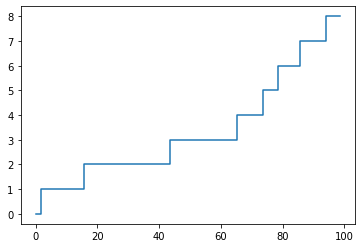

In [8]:
s = spoi(0.1, 100)
plt.step(s, range(len(s)), where='mid')

## Exercice
Coder une seconde fonction sspoi qui a les mêmes
paramètres, mais qui utilise la construction générale d'un processus
de Poisson. Donc elle genère une variable $N$ de loi $Pois(\lambda
T)$ Puis elle génère $N$ uniformes sur $[0,T]$ qu'elle
trie. Utiliser les 
commandes ,rnd.poisson,rnd.runif et x.sort() pour
trier un tableau de valeurs. Et affichez également le processus
obtenu.

Pour être pleinement convaincu que cette seconde méthode génère bien
un processus de Poisson classique, vous allez illustrer le fait que le
premier temps de saut est une variable exponentielle de paramètre
$\lambda$ en générant $n=500$ telles variables et en traçant
l'histogramme et la densité de la loi exponentielle.

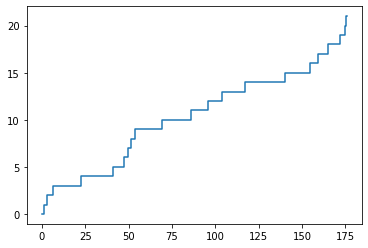

In [9]:
def sspoi(lam, T):
    # N ~ P(𝜆T)
    N = rnd.poisson(lam*T)
    # N uniformes sur [0,T]
    U = (rnd.uniform(0, T, N))
    # Trie les N uniformes
    U.sort()
    return(U)

s = sspoi(lam, 200)
plt.step(s, range(len(s)), where='mid')

Le premier temps de saut est bien une variable exponentielle de paramètre 𝜆, comme on peut l'observer ci-dessous.

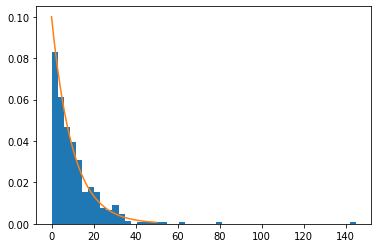

In [10]:
T = 1000
prem_saut = [sspoi(lam, T)[0] for i in range(500)]

plt.hist(prem_saut, 50, density = True)
tt = np.linspace(0.0, 50, 500)
plt.plot(tt, lam*np.exp(-lam*tt))

 ## Le paradoxe de l'autobus
 Dans un premier temps on suppose que l'on arrive à $t=15h00=15*60$
minutes et que l'on désire déterminer les valeurs moyennes de l'âge
$A_t=t-S_{N_t}$ et du temps de vie résiduel $R_t = S_{1+N(t)}-t$, qui
sont respectivement l'intervalle depuis le passage du dernier bus et
le temps d'attente du prochain bus.

On écrit donc une fonction _attente_ qui prend en paramètres
$\lambda$ et $t$ et revoie le couple de valeurs $A_t,R_t$.

def attente(lam,t):
>...

>return ((at,rt))


In [11]:
def attente(lam, t):
    T = 1440 #24heures
    s = sspoi(lam, T)
    j = 0
    while(s[j]<t):
        j += 1
    j = j-1
    At = t-s[j]
    Rt = s[j+1]-t
    return(At, Rt)

attente(0.1, 900)

(4.45729496003753, 6.970542829307647)

Puis on utilise

In [12]:
lam = 0.1
t = 900
res = np.array([attente(lam,t) for i in range(1000)])
res

array([[ 0.87940964,  6.3558353 ],
       [ 7.84914128, 11.84380569],
       [ 5.77959403,  0.40925749],
       ...,
       [10.99158269, 13.71915997],
       [12.46087897, 11.62097217],
       [22.55661566,  3.27209372]])

qui fabrique un vecteur contenant 1000 réplications (i.e. les valeurs
de 1000 appels successifs de la fonction) et on les place dans une
matrice, en calculant la moyenne des lignes ce qui par la loi des
grands nombres donne des estimations des moyennes recherchées
 

In [13]:
m = res.reshape(2, 1000)
print(m)
m.mean(axis = 1)

[[ 0.87940964  6.3558353   7.84914128 ... 17.28960044 32.95328044
  22.72032388]
 [13.60696592  2.8767035  10.7796063  ... 11.62097217 22.55661566
   3.27209372]]


array([ 9.33486007, 10.1369419 ])

## Exercice
Pour illustrer l'indépendance par rapport à l'instant d'arrivée, faire
les mêmes calculs en tirant cette fois au hasard votre temps d'arrivée
à l'arrêt,  en utilisant par exemple une loi uniforme sur 15h, 15h15.

In [14]:
# On tire au hasard le temps d'arrivée à l'arrêt avec une loi uniforme sur 15h - 15h15
t = [rnd.uniform(900, 915) for i in range(1000)]
res = np.array([attente(lam,i) for i in t])
m = res.reshape(2, 1000)
moy = m.mean(axis = 1)

# On affiche cov((At, Rt), t) pour illustrer l'indépendance (ie cov(At, t) et cov(Rt, t) proche de 0)
print(np.cov(m, np.transpose(t), bias= True))

[[ 9.60097293e+01 -1.20847615e+00 -5.24905690e-02]
 [-1.20847615e+00  1.02346032e+02  2.19477657e-01]
 [-5.24905690e-02  2.19477657e-01  1.91215712e+01]]


Vérifier vos simulations  en utilisant le calcul matriciel. Sous Python, le produit matriciel des matrices p et q s'écrit np.dot(p,q) ce qui est très différent de $p*q$. Ecrivez une fonction puis(p,n) qui renvoie la matrice $p^n$. (Vous pouvez utiliser un algorithme de calcul rapide de
puissance si vous savez le coder).

In [18]:
def puis(p, n):
    for i in range(n):
        p = np.dot(p, p)
    return(p)

## Taille optimale d'un buffer

On fixe les valeurs du coût de vidage  $K=100$ euros  et $\lambda=1$,
i.e. on a un message en moyenne par unité de temps. En faisant varier le
coût unitaire $h$ de stockage d'un message (valeurs $0.1,1,10 $ ou $100$),
calculer le coût moyen par cycle en effectuant un grand nombre (n=500)
de cycles, et ce pour suffisamment de valeurs de $T$ pour identifier
la valeur optimale.

On pourra écrire d'abord une fonction



$\tau_{t} = \frac{1}{T} (h {\sum \limits_{i=1}^{N(t)} (T - t_{i})} + K)$
$\tau_{t}$ est le coût unitaire observé pour la réalisation d'un cycle.

In [15]:
def coutcycle(T,h,K,lam):
    A = sspoi(lam, T)
    diff = []
    for i in range(len(A)):
        diff.append(T-A[i])
    tau = (h*sum(diff) + K)/T
    return(tau)

h = 0.1
K = 100
lam = 1
T = 100

c = coutcycle(T, h, K, lam)
print(c)

6.0949532729719245


qui calcule le coût unitaire observé pour la réalisation d'un cycle. 

Commandes Python : np.linspace pour construire un vecteurs de valeurs
uniformément réparties


Ensuite il faut une fonction qui donne le coût moyen estime par la loi
forte des grands nombres





In [16]:
def coutmoyemp(T,h,K,lam,n):
    X = 0
    for i in range(n):
        X += coutcycle(T,h,K,lam)
    X = (1/n)*X
    return(X)
   
n= 500
c_moy = coutmoyemp(100, h, K, lam, n)
print(c_moy)

5.947387816489652



Puis on tracera, au moins pour une valeur de $h$, la courbe qui donne
le coût moyen estimé en fonction de $T$. Et la on vérifiera que la
valeur $T^*$ calculée en TD est bien optimale.

44.721359549995796


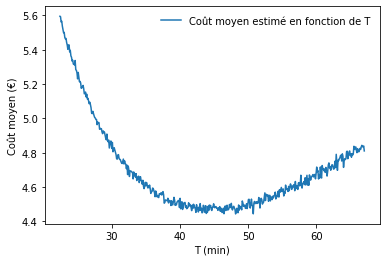

In [17]:
fig, ax = plt.subplots(1, 1)

Tstar = np.sqrt(2*K/(lam*h))
print(Tstar)

T = np.linspace(Tstar/2, Tstar+(Tstar/2), n)

def y(T, h, K, lam, n):
    B = []
    for i in range(n):
        B.append(coutmoyemp(T[i], h, K, lam, n))
    return(B)
    
ax.plot(T, y(T, h, K, lam, n), label = "Coût moyen estimé en fonction de T")
ax.legend(loc='best', frameon=False)
plt.xlabel('T (min)')
plt.ylabel('Coût moyen (€)')
plt.show()

On vérifie bien sur le graphe ci-dessus que $T^* = \sqrt{\frac{2K}{h\lambda}}$ est optimal car c'est là que le coût moyen est optimal.